# TUEV

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set a nice style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# --- IMPORTANT: Set the correct path to your log file ---
log_file_path = 'checkpoints/finetune_tuev/log.txt'
# ---------------------------------------------------------

data = []
try:
    with open(log_file_path, 'r') as f:
        for line in f:
            # Each line is a JSON object, so we load it into a dictionary
            data.append(json.loads(line))

    # Convert the list of dictionaries into a pandas DataFrame
    df = pd.DataFrame(data)
    
    # Display the first few rows to make sure it loaded correctly
    print("Successfully loaded the log file. Here are the first 5 epochs:")
    display(df.head())

except FileNotFoundError:
    print(f"Error: The file '{log_file_path}' was not found.")
    print("Please make sure the path is correct.")
except json.JSONDecodeError:
    print(f"Error: Could not parse the JSON in '{log_file_path}'.")
    print("Please check if the file is corrupted or in the correct format.")

Successfully loaded the log file. Here are the first 5 epochs:


,train_lr,train_min_lr,train_loss,train_class_acc,train_loss_scale,train_weight_decay,train_grad_norm,val_accuracy,val_balanced_accuracy,val_cohen_kappa,val_f1_weighted,val_loss,test_accuracy,test_balanced_accuracy,test_cohen_kappa,test_f1_weighted,test_loss,epoch,n_parameters
0,0.000005,1.837632e-08,1.759863,0.591073,8434.725926,0.05,inf,0.652278,0.166667,0.000000,0.515007,1.645618,0.694082,0.166667,0.000000,0.568745,1.632043,0,5821142
1,0.000015,5.540323e-08,1.515295,0.642839,8192.000000,0.05,5.126381,0.666109,0.228749,0.180865,0.564566,1.287436,0.717364,0.198353,0.120658,0.616950,1.243326,1,5821142
2,0.000025,9.243015e-08,1.169574,0.742896,8192.000000,0.05,8.035331,0.731184,0.342396,0.455699,0.693592,0.955079,0.810705,0.366968,0.556831,0.756496,0.882528,2,5821142
3,0.000035,1.294571e-07,0.870913,0.840596,7676.207407,0.05,inf,0.765104,0.424982,0.580779,0.745462,0.810563,0.754390,0.407601,0.526912,0.731352,0.813862,3,5821142
4,0.000045,1.664840e-07,0.712968,0.883767,4096.000000,0.05,15.563924,0.744504,0.412693,0.555699,0.751274,0.810965,0.761491,0.482673,0.560514,0.770338,0.794222,4,5821142


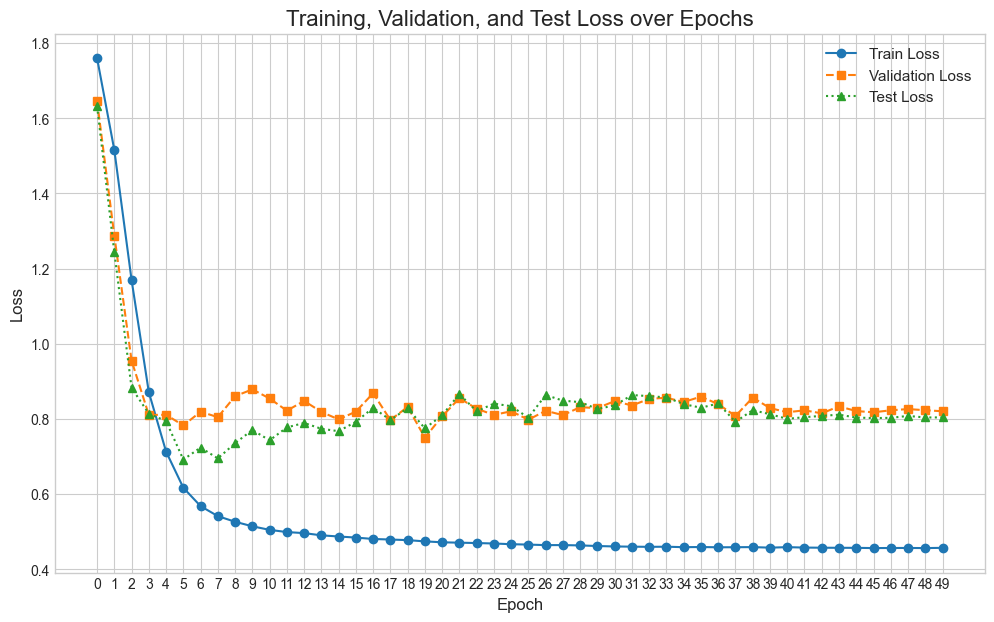

In [5]:
if 'df' in locals():
    plt.figure(figsize=(12, 7))

    plt.plot(df['epoch'], df['train_loss'], marker='o', linestyle='-', label='Train Loss')
    plt.plot(df['epoch'], df['val_loss'], marker='s', linestyle='--', label='Validation Loss')
    plt.plot(df['epoch'], df['test_loss'], marker='^', linestyle=':', label='Test Loss')

    plt.title('Training, Validation, and Test Loss over Epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.xticks(df['epoch']) # Ensure every epoch number is shown as a tick
    plt.legend(fontsize=11)
    plt.grid(True)
    plt.show()

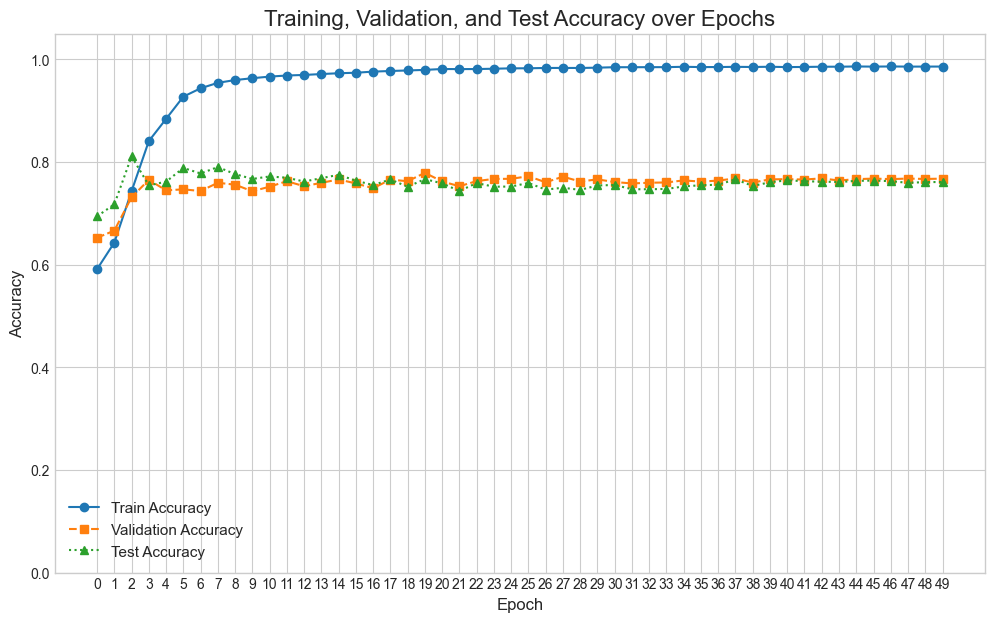

In [6]:
if 'df' in locals():
    plt.figure(figsize=(12, 7))

    plt.plot(df['epoch'], df['train_class_acc'], marker='o', linestyle='-', label='Train Accuracy')
    plt.plot(df['epoch'], df['val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy')
    plt.plot(df['epoch'], df['test_accuracy'], marker='^', linestyle=':', label='Test Accuracy')

    plt.title('Training, Validation, and Test Accuracy over Epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xticks(df['epoch'])
    plt.legend(fontsize=11)
    plt.ylim(0.0, 1.05) # Accuracy is between 0 and 1
    plt.grid(True)
    plt.show()

In [16]:
if 'df' in locals() and not df.empty:
    # Find the index of the row with the highest validation accuracy
    best_epoch_idx = df['val_accuracy'].idxmax()
    
    # Get all the stats from that best epoch
    best_epoch_stats = df.loc[best_epoch_idx]
    
    print("--- Best Model Performance (based on Max Validation Accuracy) ---")
    print(f"Best Epoch: {int(best_epoch_stats['epoch'])}")
    print(f"  - Validation Accuracy: {best_epoch_stats['val_accuracy']:.4f}")
    print(f"  - Validation F1-Score: {best_epoch_stats['val_f1_weighted']:.4f}")
    print(f"\nCorresponding performance on the Test set at this epoch:")
    print(f"  - Test Accuracy: {best_epoch_stats['test_accuracy']:.4f}")
    print(f"  - Test F1-Score: {best_epoch_stats['test_f1_weighted']:.4f}")

--- Best Model Performance (based on Max Validation Accuracy) ---
Best Epoch: 19
  - Validation Accuracy: 0.7787
  - Validation F1-Score: 0.7867

Corresponding performance on the Test set at this epoch:
  - Test Accuracy: 0.7665
  - Test F1-Score: 0.7830
